# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

В рамках данного исследования планируется рассмотреть общую информацию об имеющихся данных и провести их предобработку. После этого необходимо добавить новые столбцы с производными значениями от изначальных данных, чтобы провести сам анализ данных. В рамках анализа планируется рассмотреть зависимость цены квартир от остальных параметров таблицы, таких как, общая и жилая площадь, тип этажа и расстояние до центра города.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        14504 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           21796 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          2775 non-null   object 
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               12180 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

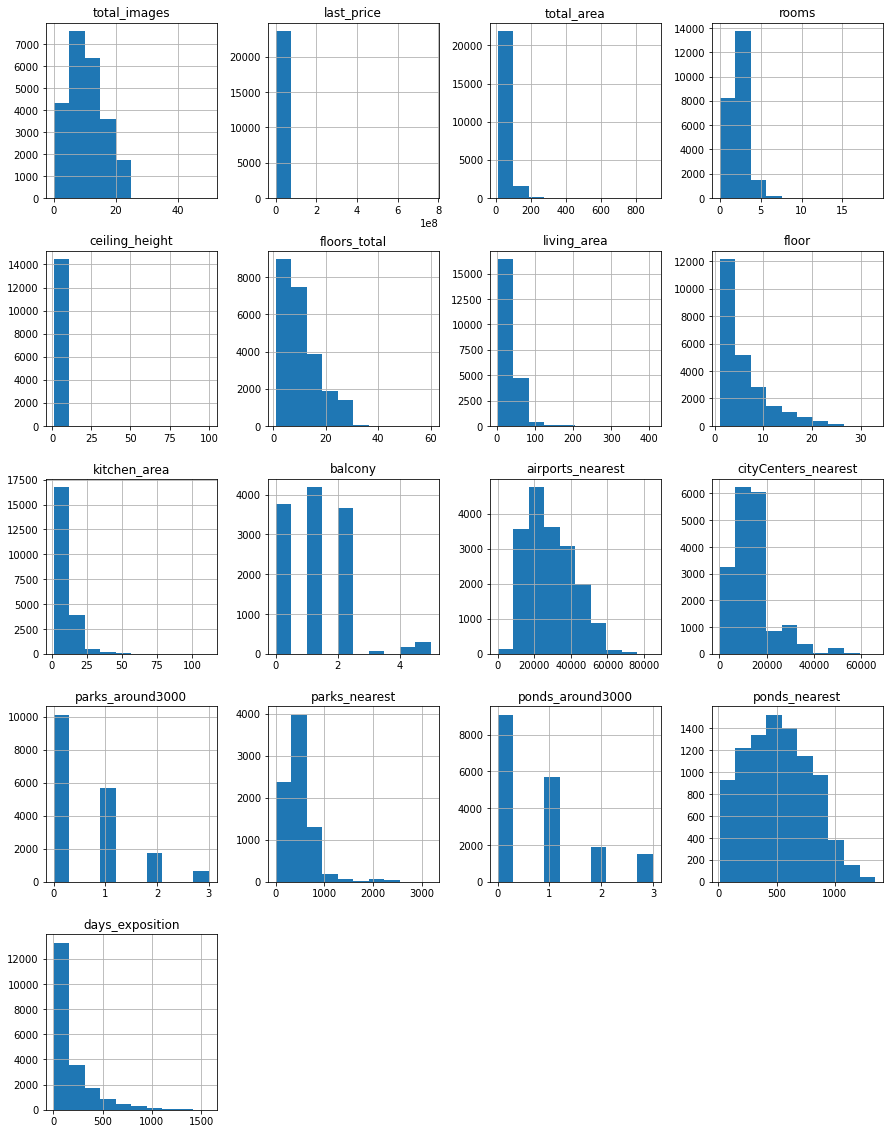

In [3]:
data.hist(figsize=(15, 20))

Если посмотреть на результаты метода info(), можно заметить пропуски в данных (столбцы ceiling_height, floors_total, is_apartment, parks_nearest, ponds_nearest и др.) Также типы данных first_day_exposition и is_apartment явно не соответствуют тем, что должны в них быть. Из гистограмм видно, что некоторых столбцах присутствуют выбросы, что уменьшают наглядность.

### Выполним предобработку данных

#### Избавляемся от пропусков в данных

In [4]:
# Избавимся от пропусков и в столбце ceiling_height, заменим их медианным значением, во избежание влияния выбросов
median_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=median_height)
data.info()


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        23699 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           21796 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          2775 non-null   object 
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               12180 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

In [5]:
# Заменим пропуски в столбце living_area медианным числом, рассчитанным группировкой по количеству комнат
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        23699 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           23699 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          2775 non-null   object 
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               12180 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

In [6]:
# Пропуски в столбце is_apartment целесообразно заменить значением False
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        23699 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           23699 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          23699 non-null  bool   
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               12180 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

In [7]:
# Пропуски в столбце balcony заменим на 0
data['balcony'] = data['balcony'].fillna(value=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        23699 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           23699 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          23699 non-null  bool   
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               23699 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

**Вывод по пропускам:** Пропуски в столбцах floors_total, locality_name, kitchen_area, airport_nearest, cityCenters_nearest, days_exposition в дальнейшем планируется использовать при создании новых столбцов и расчетов зависимостей, поэтому заменить их медианным или средним значением без вреда для дальнейших расчетов не представляется возможным. В свою очередь, пропусков в столбцах parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest слишком много, чтобы заменить их без вреда для выборки, т.к. в дальнейшем анализе они не участвуют, пропуски в данных столбцах было принято решение оставить.

Возникновение пропусков можно объяснить источником заполнения данных, большое количество пропусков в той части данных, которая заполняется автоматически из данных геосервисов, необходимо передать эту информацию команде разработки.


#### Изменение типов данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   total_images          23699 non-null  int64  
, 1   last_price            23699 non-null  float64
, 2   total_area            23699 non-null  float64
, 3   first_day_exposition  23699 non-null  object 
, 4   rooms                 23699 non-null  int64  
, 5   ceiling_height        23699 non-null  float64
, 6   floors_total          23613 non-null  float64
, 7   living_area           23699 non-null  float64
, 8   floor                 23699 non-null  int64  
, 9   is_apartment          23699 non-null  bool   
, 10  studio                23699 non-null  bool   
, 11  open_plan             23699 non-null  bool   
, 12  kitchen_area          21421 non-null  float64
, 13  balcony               23699 non-null  float64
, 14  locality_name         23650 non-null  object 
, 15 

Следует изменить тип данных с вещественных чисел на целые в столбцах last_price, firts_day_exposition, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition


In [9]:
data['last_price'] = data['last_price'].astype(dtype='int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(dtype='int', errors='ignore')
data['balcony'] = data['balcony'].astype(dtype='int', errors='ignore')
data['airports_nearest'] = data['airports_nearest'].astype(dtype='int', errors='ignore')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(dtype='int', errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype(dtype='int', errors='ignore')
data['parks_nearest'] = data['parks_nearest'].astype(dtype='int', errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype(dtype='int', errors='ignore')
data['ponds_nearest'] = data['ponds_nearest'].astype(dtype='int', errors='ignore')
data['days_exposition'] = data['days_exposition'].astype(dtype='int', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 23699 entries, 0 to 23698
,Data columns (total 22 columns):
, #   Column                Non-Null Count  Dtype         
,---  ------                --------------  -----         
, 0   total_images          23699 non-null  int64         
, 1   last_price            23699 non-null  int64         
, 2   total_area            23699 non-null  float64       
, 3   first_day_exposition  23699 non-null  datetime64[ns]
, 4   rooms                 23699 non-null  int64         
, 5   ceiling_height        23699 non-null  float64       
, 6   floors_total          23613 non-null  float64       
, 7   living_area           23699 non-null  float64       
, 8   floor                 23699 non-null  int64         
, 9   is_apartment          23699 non-null  bool          
, 10  studio                23699 non-null  bool          
, 11  open_plan             23699 non-null  bool          
, 12  kitchen_area          21421 non-null  float64       
, 13

Типы данных следует менять во избежание ошибок, возникающих при использовании функций и методов к типам данных, которые ими не поддерживаются. 
Так в квартире не может быть 1,5 комнаты или балкона, тип данных в столбцах rooms и balcony изменен на int64, а значения столбца first_day_exposition в datetime. Некоторые столбцы из-за пропусков все еще остались типа float64.

In [10]:
# Избавимся от неявных дубликатов в столбце locality_name
data['locality_name'].unique()
data['locality_name'] = data.locality_name.replace({'посёлок':'поселок'}, regex=True)
data['locality_name'] = data['locality_name'].replace('Мурино','поселок Мурино')
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово')
data['locality_name'] = data['locality_name'].replace('Никольское','село Никольское')
data['locality_name'] = data.locality_name.replace({'городской поселок':'поселок городского типа'}, regex=True)
data['locality_name'] = data['locality_name'].replace('Садовое товарищество Рахья','поселок городского типа Рахья')
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы','поселок Зимитицы')
data['locality_name'] = data['locality_name'].replace('поселок Рябово','поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево','поселок станции Вещево')



In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

### Добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы, которые нам помогут в дальнейшем исследовании:
1. Цена одного квадратного метра - meter_cost
2. День недели публикации объявления - day_of_exposition
3. Месяц публикации объявления - month_of_exposition
4. Год публикации объявления - year_of_exposition
5. Тип этажа квартиры - floor_type
6. Расстояние до центра города в километрах - city_centers_kilometer

In [12]:
data['meter_cost'] = data['last_price'] / data['total_area']
data['meter_cost'] = data['meter_cost'].round(2)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [13]:
data['day_of_exposition'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


In [14]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6


In [15]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [16]:
def category_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data.apply(category_floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


In [17]:
data['city_centers_kilometer'] = data['cityCenters_nearest'] / 1000
data['city_centers_kilometer'] = data['city_centers_kilometer'].round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_kilometer
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведем исследовательский анализ данных

#### Обработка редких и выбивающихся значений

In [18]:
# Создадим переменную data_shape, в которой отразим изначальный размер выборки, до обработки выбросов
data_shape = data.shape

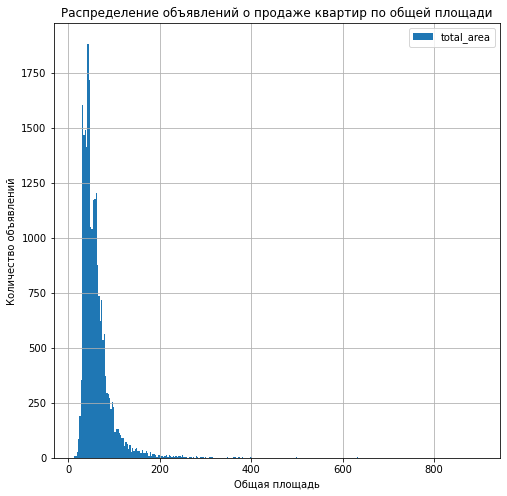

In [66]:
data['total_area'].hist(bins=300, figsize=(8, 8), legend=True)
plt.title('Распределение объявлений о продаже квартир по общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

In [20]:
display(data.query('total_area > 350').sort_values('total_area', ascending=False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_kilometer
19540,8,420000000,900.00,2017-12-06,12,2.80,25.0,409.700,25,False,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
12859,20,140000000,631.20,2019-04-09,7,3.90,4.0,322.300,4,False,...,NaN,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
3117,19,140000000,631.00,2019-03-30,7,2.65,5.0,145.000,5,False,...,NaN,2.0,210.0,NaN,221870.05,5,3,2019,последний,5.0
15651,20,300000000,618.00,2017-12-18,7,3.40,7.0,258.000,5,False,...,NaN,2.0,198.0,111.0,485436.89,0,12,2017,другой,5.0
5358,20,65000000,590.00,2019-02-14,15,3.50,6.0,409.000,3,False,...,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,5.0
4237,1,50000000,517.00,2017-10-14,7,2.65,4.0,332.000,3,False,...,477.0,2.0,540.0,NaN,96711.80,5,10,2017,другой,2.0
8018,20,84000000,507.00,2015-12-17,5,4.45,7.0,301.500,7,True,...,110.0,0.0,NaN,1078.0,165680.47,3,12,2015,последний,6.0
5893,3,230000000,500.00,2017-05-31,6,2.65,7.0,123.900,7,False,...,NaN,2.0,198.0,50.0,460000.00,2,5,2017,последний,5.0
15016,8,150000000,500.00,2016-01-13,4,3.20,7.0,63.600,7,False,...,209.0,3.0,531.0,303.0,300000.00,2,1,2016,последний,6.0
12401,20,91500000,495.00,2017-06-19,7,4.65,7.0,347.500,7,False,...,110.0,0.0,NaN,14.0,184848.48,0,6,2017,последний,6.0


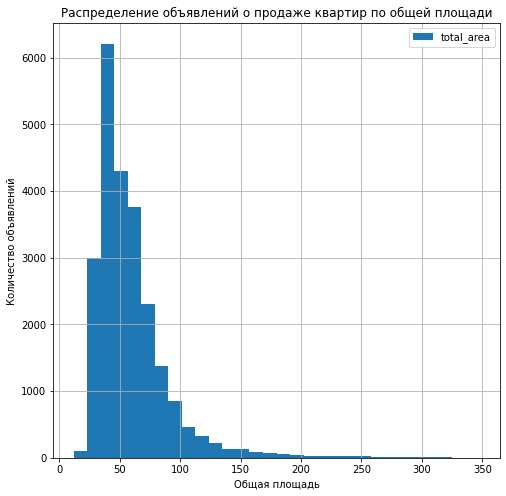

In [67]:
# Удалим значения больше 350 кв.метров из-за их небольшого количества и отличия от остальной выборки
data_clear = data.loc[data['total_area'] < 350]
data_clear['total_area'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

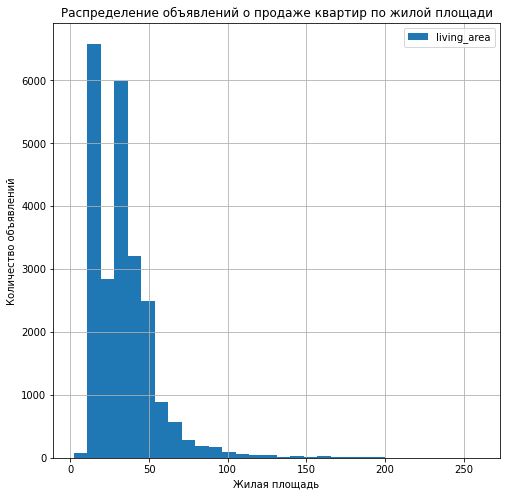

In [68]:
data_clear['living_area'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()

In [23]:
display(data_clear.query('living_area > 200').sort_values('living_area', ascending=False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_kilometer
19865,20,180000000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,...,537.0,3.0,501.0,834.0,518731.99,2,1,2015,другой,4.0
1085,16,75000000,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,...,398.0,2.0,515.0,259.0,232198.14,0,7,2017,другой,1.0
793,20,135000000,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,...,295.0,3.0,190.0,342.0,435483.87,1,5,2018,другой,7.0
15701,12,83000000,293.6,2017-11-10,4,2.65,9.0,250.0,7,False,...,164.0,0.0,NaN,NaN,282697.55,4,11,2017,другой,6.0
2580,6,30900000,338.6,2017-10-16,7,3.86,6.0,230.0,4,False,...,NaN,0.0,NaN,406.0,91258.12,0,10,2017,другой,6.0
16915,14,29000000,292.2,2017-01-12,9,3.35,5.0,225.9,4,False,...,263.0,0.0,NaN,825.0,99247.09,3,1,2017,другой,5.0
7857,11,150000000,230.0,2017-10-25,8,2.65,8.0,220.0,8,False,...,116.0,0.0,NaN,135.0,652173.91,2,10,2017,последний,6.0
21685,7,22160000,277.6,2017-08-19,7,3.80,6.0,211.0,3,False,...,375.0,1.0,479.0,22.0,79827.09,5,8,2017,другой,6.0


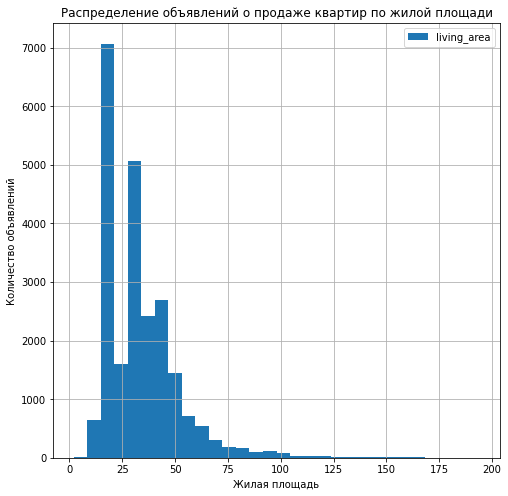

In [65]:
# Удалим значения больше 200 кв.метров из-за их небольшого количества и отличия от остальной выборки
data_clear = data_clear.loc[data['living_area'] < 200]
data_clear['living_area'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()

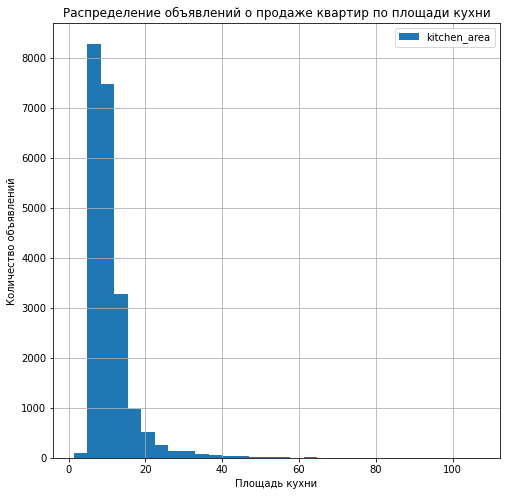

In [69]:
data_clear['kitchen_area'].hist(bins=30, figsize=(8, 8), legend=True)
plt.title('Распределение объявлений о продаже квартир по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()

In [26]:
display(data_clear.query('kitchen_area > 60').value_counts('kitchen_area'))

kitchen_area
64.0     3
63.0     2
65.0     2
77.0     2
62.0     1
62.5     1
63.4     1
70.0     1
72.0     1
75.0     1
87.2     1
93.0     1
93.2     1
100.7    1
107.0    1
dtype: int64

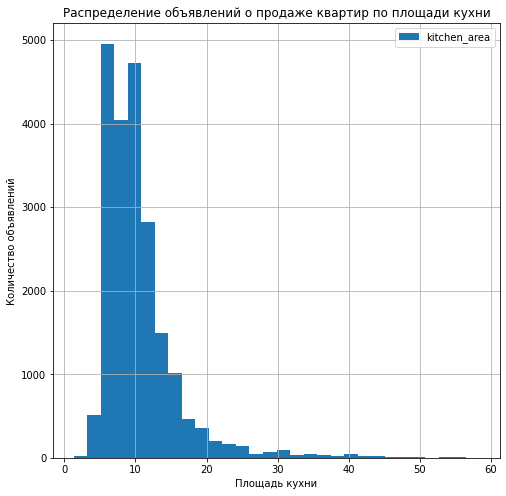

In [70]:
data_clear = data_clear[(data_clear['kitchen_area'].isna()) | (data_clear['kitchen_area'] < 60)]
data_clear['kitchen_area'].hist(bins=30, figsize=(8, 8), legend=True)
plt.title('Распределение объявлений о продаже квартир по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()

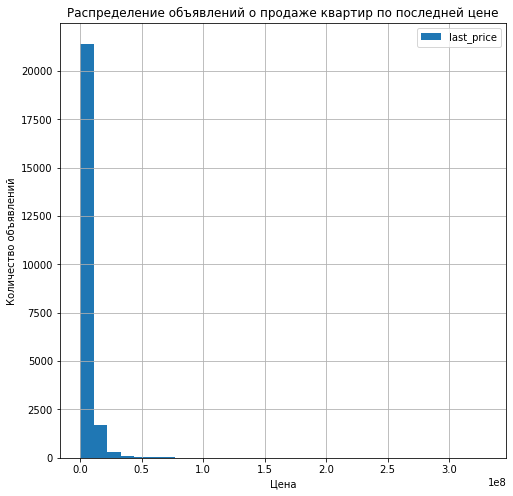

In [71]:
data_clear['last_price'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по последней цене')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

In [29]:
data_clear.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_kilometer
5698,7,450000,42.0,2017-07-31,2,2.65,1.0,23.0,1,False,...,NaN,NaN,NaN,233.0,10714.29,0,7,2017,последний,NaN
6859,6,490000,40.0,2017-12-11,1,2.65,5.0,17.6,3,False,...,NaN,NaN,NaN,43.0,12250.00,0,12,2017,другой,NaN
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,805.0,0.0,NaN,8.0,111.83,2,3,2019,последний,9.0
9581,7,450000,43.4,2018-08-31,2,2.65,5.0,30.3,3,False,...,NaN,NaN,NaN,96.0,10368.66,4,8,2018,другой,NaN
10782,3,490000,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,...,NaN,NaN,NaN,719.0,16838.49,3,5,2016,последний,NaN
14911,5,430000,54.0,2018-06-26,2,2.65,3.0,30.5,3,False,...,NaN,NaN,NaN,44.0,7962.96,1,6,2018,последний,NaN
16032,8,480000,32.0,2019-01-06,1,2.65,2.0,16.0,1,False,...,NaN,NaN,NaN,83.0,15000.00,6,1,2019,первый,NaN
16219,14,450000,38.5,2018-07-11,2,2.65,2.0,30.5,1,False,...,NaN,NaN,NaN,45.0,11688.31,2,7,2018,первый,NaN
16274,18,440000,40.0,2018-07-10,1,2.65,5.0,17.6,1,False,...,NaN,NaN,NaN,45.0,11000.00,1,7,2018,первый,NaN
17456,7,430000,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,...,NaN,NaN,NaN,NaN,14144.74,0,4,2019,первый,NaN


In [30]:
data_clear = data_clear.query('last_price != 12190')
data_clear['last_price'].sort_values(ascending=False).head(15)

1436     330000000
22831    289238400
16461    245000000
8900     190870000
19155    160000000
2536     159984000
16495    159000000
22229    148000000
12674    140000000
2243     130278280
13864    130000000
1928     125000000
20349    124480000
21023    124350000
4996     124000000
Name: last_price, dtype: int64

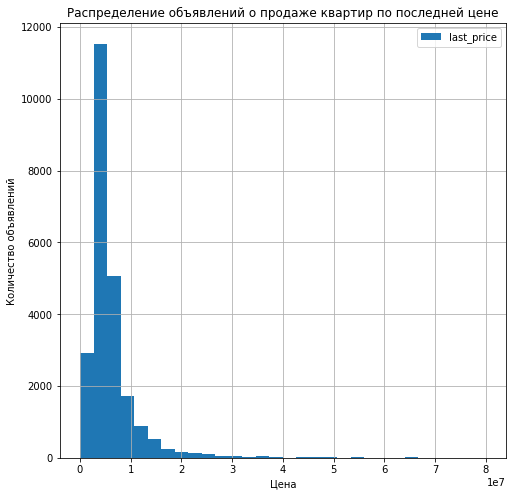

In [72]:
data_clear = data_clear.query('last_price <= 80000000')
data_clear['last_price'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по последней цене')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

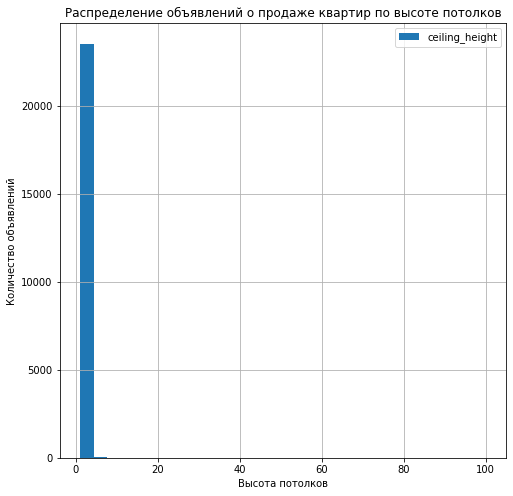

In [73]:
data_clear['ceiling_height'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

In [33]:
data_clear['ceiling_height'].sort_values(ascending=True)

22590      1.00
5712       1.20
16934      1.75
552        2.00
22960      2.00
          ...  
17857     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23594, dtype: float64

In [34]:
# По госту высота потолков не может быть ниже 2,5 метров, поэтому уберем все значения меньше 2,5
data_clear = data_clear.query('ceiling_height >= 2.50')
# Значения больше 25 разделим на 10, логично предположить, что из-за ошибки значения 2,7 или 3,2 превратились в совершенно неподходящие 27 метров
data_clear.loc[data_clear['ceiling_height'] >= 25.0, 'ceiling_height'] = (data_clear['ceiling_height'] / 10)
data_clear['ceiling_height'].sort_values(ascending=True)

23698     2.5
2809      2.5
2810      2.5
7198      2.5
2812      2.5
         ... 
22309    10.3
15061    14.0
17496    20.0
20507    22.6
5076     24.0
Name: ceiling_height, Length: 23521, dtype: float64

In [35]:
display(data_clear.loc[data_clear['ceiling_height'] > 5.0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_cost,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_kilometer
464,15,66571000,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
3474,3,1400000,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,NaN,NaN,NaN,125.0,46666.67,4,3,2018,другой,NaN
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,397.0,1.0,578.0,7.0,126229.51,2,10,2018,первый,8.0
5863,20,5650000,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,NaN,1.0,613.0,14.0,125555.56,2,8,2018,другой,11.0
7578,17,38000000,143.0,2017-11-02,3,5.5,5.0,83.0,5,False,...,479.0,0.0,NaN,NaN,265734.27,3,11,2017,последний,6.0
12628,14,3900000,50.0,2018-03-29,1,5.3,5.0,17.6,5,False,...,505.0,1.0,92.0,8.0,78000.00,3,3,2018,последний,4.0
15061,19,5600000,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,...,NaN,0.0,NaN,315.0,99290.78,4,5,2018,другой,14.0
15743,14,5600000,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,723.0,0.0,NaN,474.0,83582.09,4,11,2016,первый,11.0
17442,0,5350000,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,0.0,NaN,469.0,99074.07,1,6,2015,другой,28.0
17496,15,6700000,92.9,2019-02-19,3,20.0,17.0,53.2,14,False,...,967.0,0.0,NaN,NaN,72120.56,1,2,2019,другой,15.0


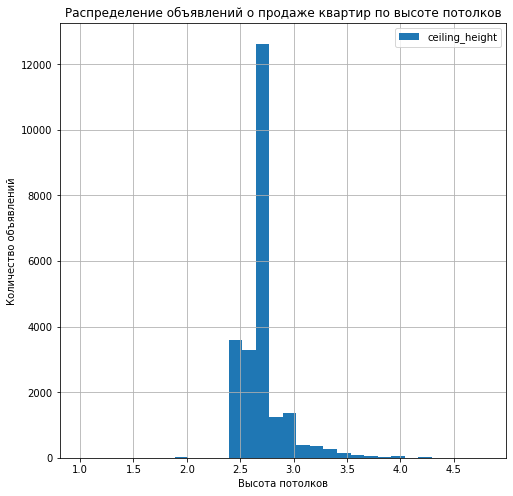

In [74]:
data_clear = data_clear.query('ceiling_height < 5.0')
data_clear['ceiling_height'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

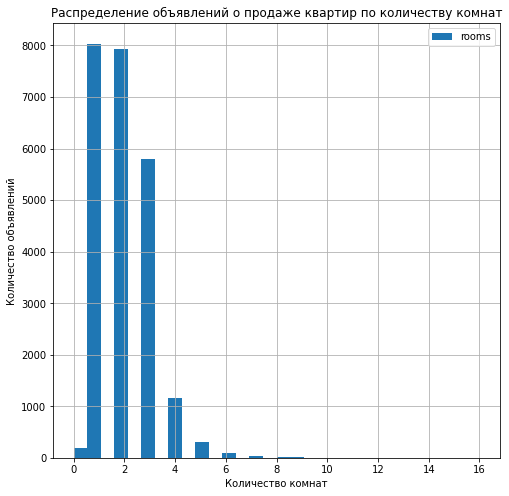

In [75]:
data_clear['rooms'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

In [38]:
data_clear['rooms'].value_counts()

1     8018
2     7900
3     5775
4     1159
5      303
0      195
6       94
7       41
8        9
9        5
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

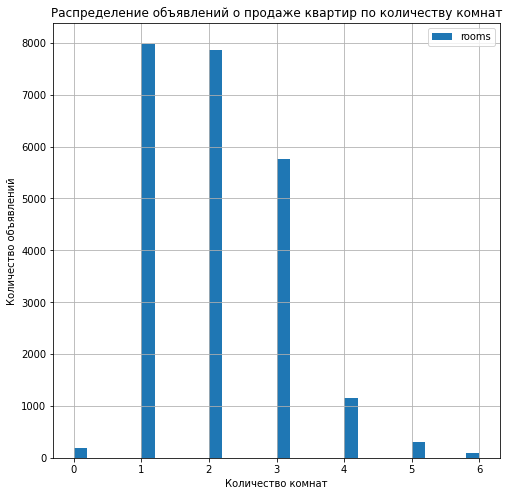

In [64]:
# Удалим квартиры с количеством комнат ,больше 6, т.к. они немногочисленны и выбиваются из общей выборки
data_clear = data_clear.query('rooms <= 6')
data_clear['rooms'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

In [40]:
data_clear['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

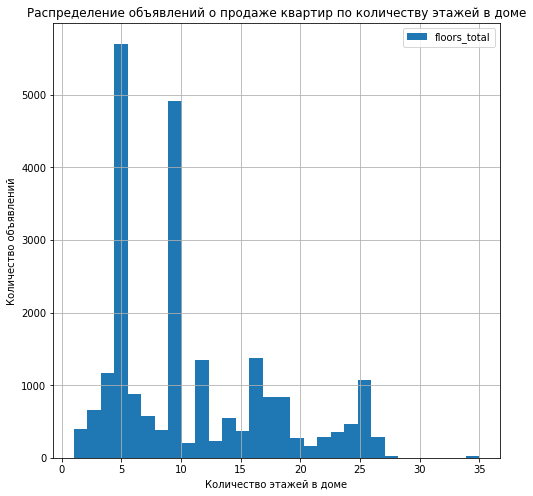

In [63]:
data_clear['floors_total'].hist(bins=30, figsize=(8, 8), legend=True)
data_clear['floors_total'].sort_values(ascending=False)

plt.title('Распределение объявлений о продаже квартир по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

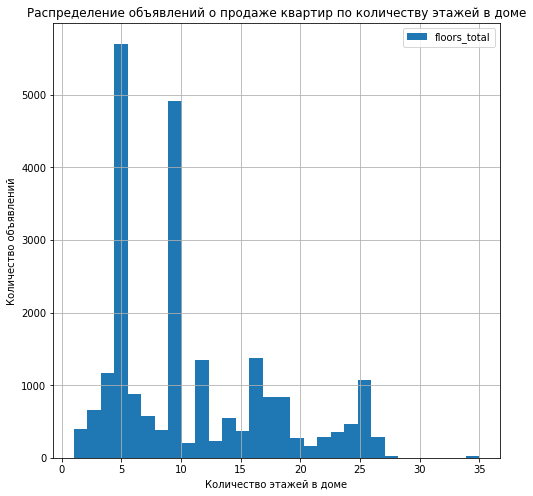

In [62]:
data_clear = data_clear.query('floors_total <= 35')
data_clear['floors_total'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

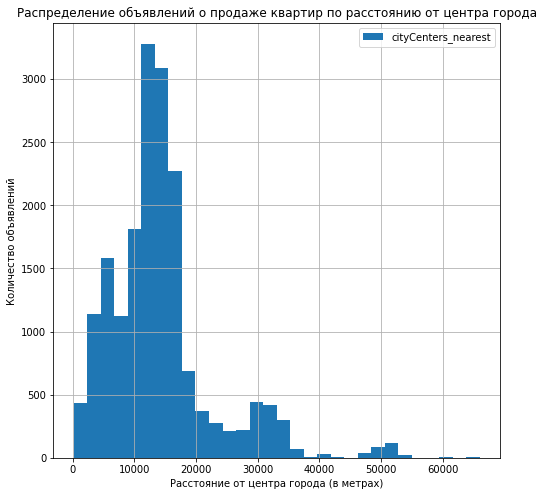

In [76]:
data_clear['cityCenters_nearest'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по расстоянию от центра города')
plt.xlabel('Расстояние от центра города (в метрах)')
plt.ylabel('Количество объявлений')
plt.show()

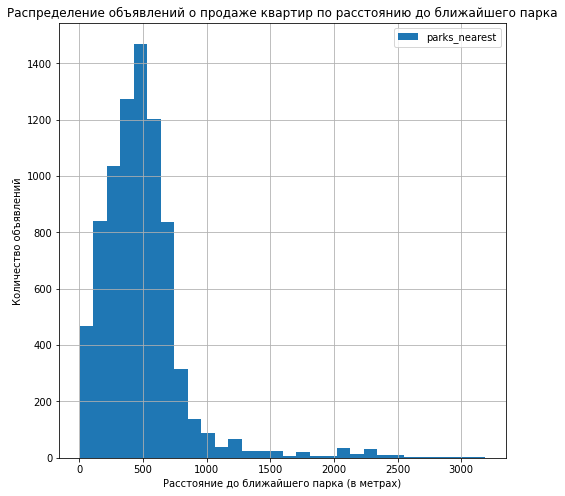

In [77]:
data_clear['parks_nearest'].hist(bins=30, figsize=(8, 8), legend=True)

plt.title('Распределение объявлений о продаже квартир по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (в метрах)')
plt.ylabel('Количество объявлений')
plt.show()

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

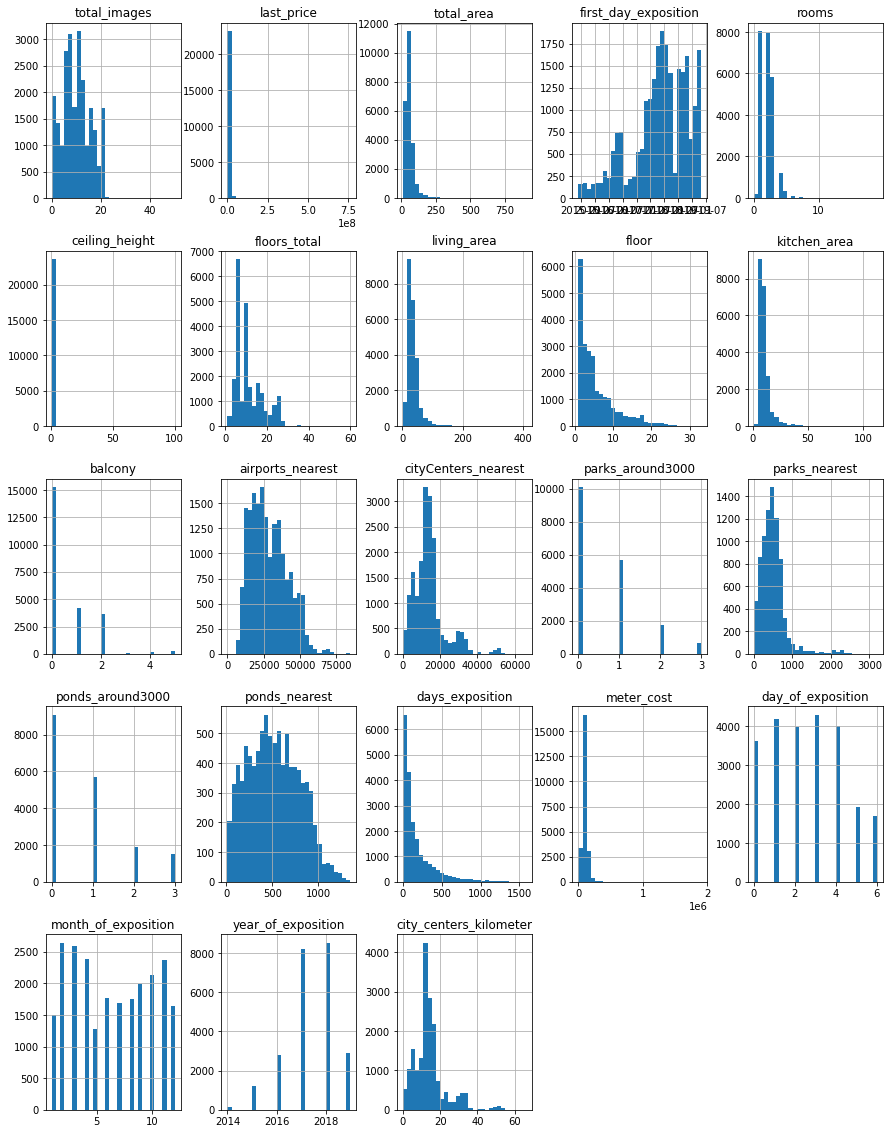

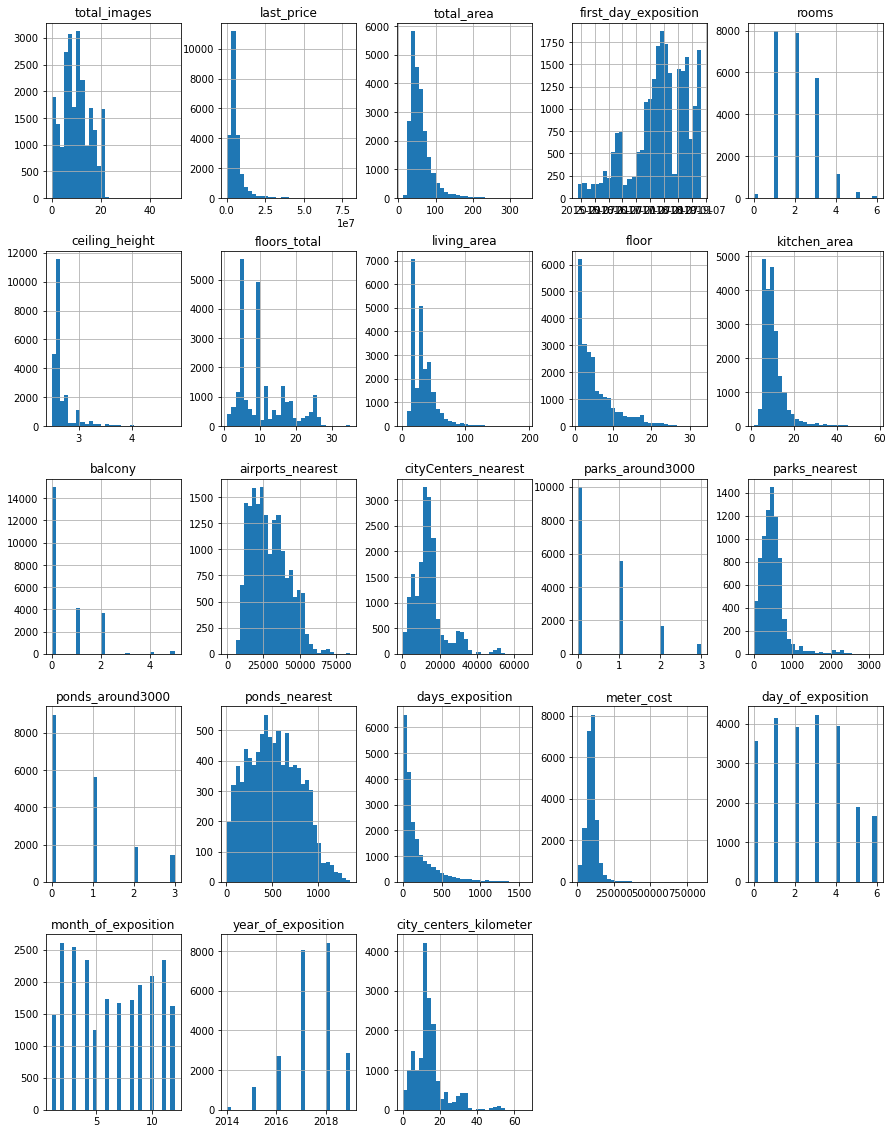

In [45]:
data.hist(bins=30, figsize=(15,20))
data_clear.hist(bins=30, figsize=(15,20))

Проверим, что после удаления выбросов у нас осталось не менее 90% изначальных данных.

In [46]:
data_clear_shape = data_clear.shape
print(data_clear_shape[0]/data_shape[0])

0.9854002278577155


**Вывод по выбивающимся значениям:** После построения диаграмм стало очевидно наличие значений, которые значительно отличаются от остальной выборки, так, например, 11-комнатная квартира и потолки высотой 100 метров. Также из выборки были удалены строки с количеством этажей больше 35. После удаления выбивающихся значений распределение стало близко к распределения Пуассона.

Для сравнения получившегося датафрейма с изначальным были построены гистограммы по всем столбцам. Гистограммы столбцов, значения которых были очищены от выбросов, стали ближе к распределению Пуассона и более наглядными.

#### Расчет показателей быстроты продажи квартир

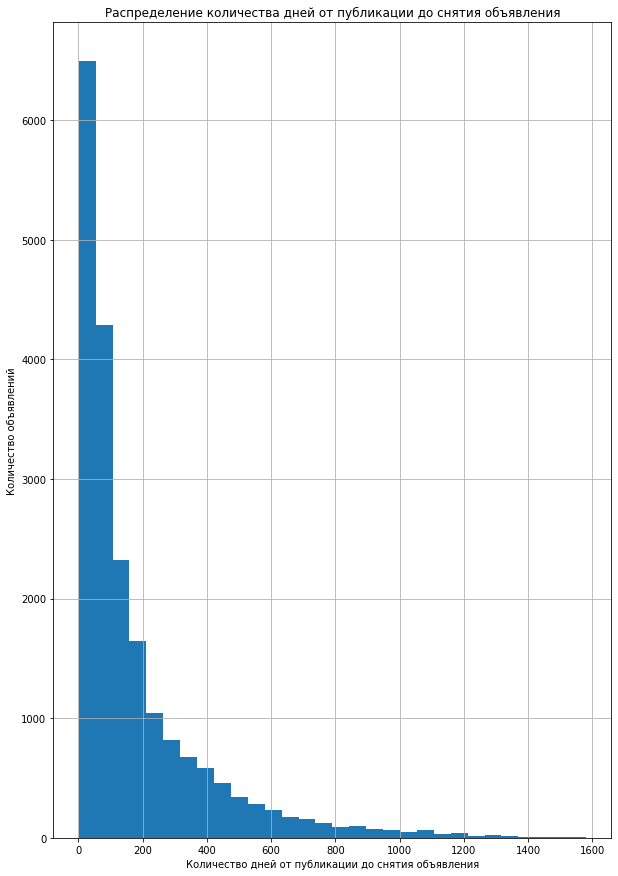

In [47]:
data_clear['days_exposition'].hist(bins=30, figsize=(8, 8))

plt.title('Распределение количества дней от публикации до снятия объявления')
plt.xlabel('Количество дней от публикации до снятия объявления')
plt.ylabel('Количество объявлений')
plt.show()

In [48]:
print('Среднее количество дней от публикации до снятия объявления:', data_clear['days_exposition'].mean().round(2))
print('Медианное количество дней от публикации до снятия объявления:', data_clear['days_exposition'].median().round(2))
data_clear['days_exposition'].value_counts()

Среднее количество дней от публикации до снятия объявления: 180.37
,Медианное количество дней от публикации до снятия объявления: 95.0


45.0      871
60.0      538
7.0       231
30.0      207
90.0      195
         ... 
818.0       1
969.0       1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1136, dtype: int64

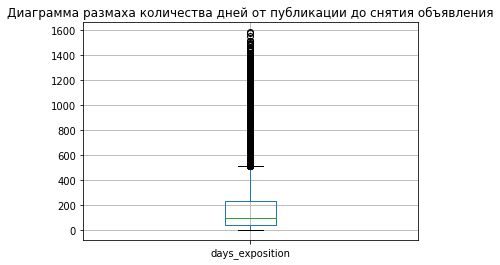

In [49]:
data_clear.boxplot(column=['days_exposition'])

plt.title('Диаграмма размаха количества дней от публикации до снятия объявления')
plt.show()

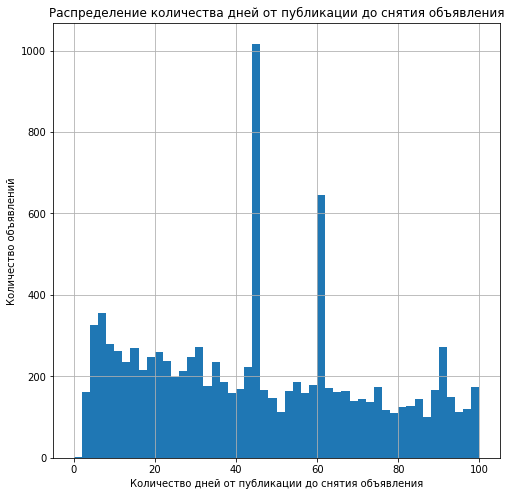

In [78]:
data_clear['days_exposition'].hist(bins=50, range=(0,100), figsize=(8, 8))

plt.title('Распределение количества дней от публикации до снятия объявления')
plt.xlabel('Количество дней от публикации до снятия объявления')
plt.ylabel('Количество объявлений')
plt.show()

На гистограмме заметны пики примерно через 45, 60 и 90, что связано с автоматическим снятием объявлений.

Посмотрим значения с диаграммы размаха в числовом виде.

In [51]:
# Вычислим значения, отображенные на диаграмме размаха
Q1 = data_clear['days_exposition'].quantile(0.25)
Q3 = data_clear['days_exposition'].quantile(0.75)
print('Первый квартиль (Q1):', Q1)
print('Первый квартиль (Q3):', Q3)


Первый квартиль (Q1): 45.00000000000001
,Первый квартиль (Q3): 231.0


**Вывод по длительности размещения объявлений:** 

Обращая внимание на диаграмму размаха и условия размещений объявлений в Яндекс.Недвижимости можно сделать вывод, что быстрыми продажами являются те, что совершились менее чем за 45 дней, а слишком долгими дольше 231 дня.

#### Поиск зависимостей между ценой квартиры и другими параметрами

Корреляция между общей площадью и ценой = 0.7608610781400472
,Корреляция между жилой площадью и ценой = 0.6392244798572734
,Корреляция между площадью кухни и ценой = 0.5731763527965863
,Корреляция между количеством комнат и ценой = 0.459466929898428


<AxesSubplot:xlabel='year_of_exposition'>

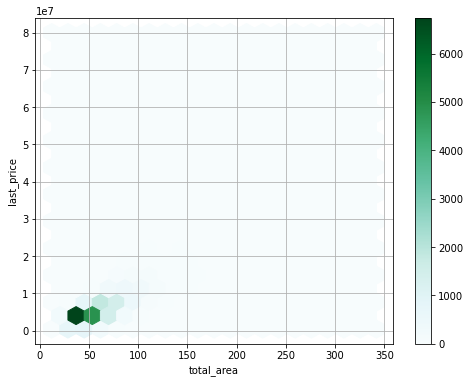

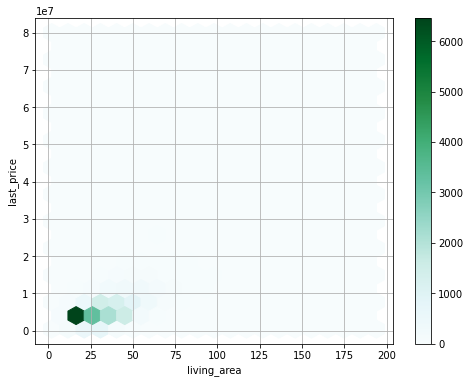

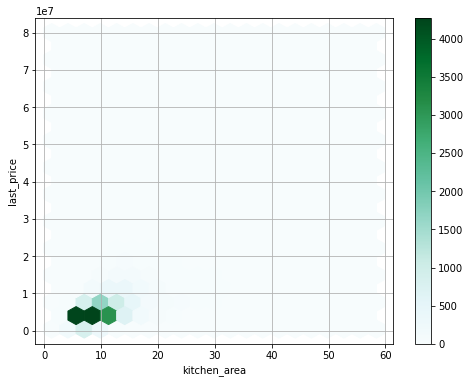

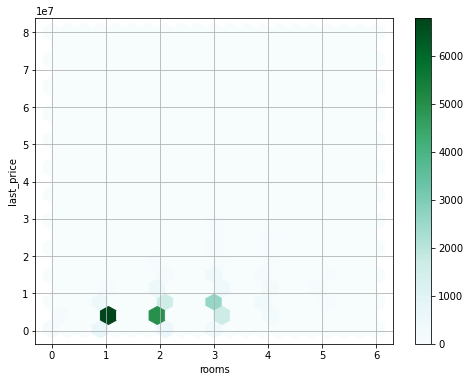

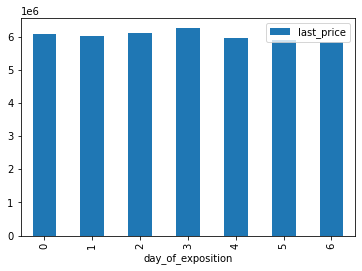

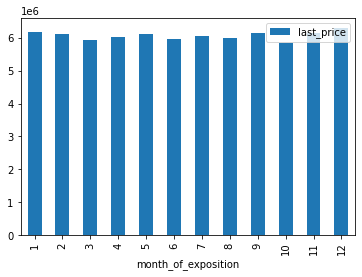

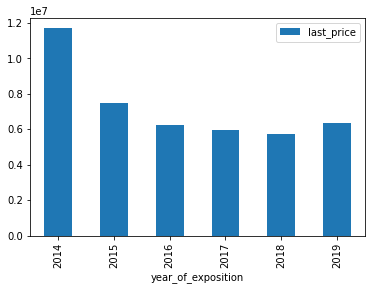

In [52]:
print('Корреляция между общей площадью и ценой =', data_clear['last_price'].corr(data_clear['total_area']))
print('Корреляция между жилой площадью и ценой =', data_clear['last_price'].corr(data_clear['living_area']))
print('Корреляция между площадью кухни и ценой =', data_clear['last_price'].corr(data_clear['kitchen_area']))
print('Корреляция между количеством комнат и ценой =', data_clear['last_price'].corr(data_clear['rooms']))
data_clear.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data_clear.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data_clear.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data_clear.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

pivot_table_day = data_clear.pivot_table(values='last_price', index='day_of_exposition')
pivot_table_day.plot(kind='bar')
pivot_table_month = data_clear.pivot_table(values='last_price', index='month_of_exposition')
pivot_table_month.plot(kind='bar')
pivot_table_year = data_clear.pivot_table(values='last_price', index='year_of_exposition')
pivot_table_year.plot(kind='bar')

In [53]:
print(data_clear.pivot_table(values='last_price', index='floor_type', aggfunc='mean').round(2))


            last_price
,floor_type            
,другой      6323154.90
,первый      4670513.16
,последний   5934181.52


Проведенный корреляционный анализ показывает, что наибольшую связь с общей ценой квартиры имеет общая площадь (0,76), после нее идет жилая площадь (0,64) и площадь кухни (0,57). В свою очередь зависимость между днем и месяцем публикации и ценой выявить невозможно, а вот по графика зависимости между годом убликации и ценой можно заметить, что с 2014 по 2018 год цена на квартиры снижалась, а в 2019 показата небольшой рост.

Стоит обратить внимание, что средняя цена по квартирам, расположенным на первом и последнем этажах, ниже, чем по квартирам на других этажах на 26 и 6 процентов соответственно. 

#### Расчет средней цены одного квадратного метра
Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [54]:
print(data_clear['locality_name'].value_counts().head(10))
locality10 = ['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'деревня Кудрово', 'Всеволожск', 'Пушкин', 'Колпино',
              'Гатчина', 'поселок Парголово', 'Выборг']
data_locality10 = data_clear.query('locality_name in @locality10')
data_mean_cost = data_locality10.pivot_table(values=['meter_cost'], index='locality_name', aggfunc='mean').round(0)
display(data_mean_cost.sort_values(by='meter_cost', ascending=False))

Санкт-Петербург      15442
,поселок Мурино         586
,деревня Кудрово        469
,поселок Шушары         439
,Всеволожск             397
,Пушкин                 361
,Колпино                336
,поселок Парголово      325
,Гатчина                307
,Выборг                 235
,Name: locality_name, dtype: int64


,meter_cost
locality_name,
Санкт-Петербург,113150.0
Пушкин,102950.0
деревня Кудрово,95262.0
поселок Парголово,90362.0
поселок Мурино,86041.0
поселок Шушары,78551.0
Колпино,75352.0
Гатчина,68746.0
Всеволожск,68719.0


Из десяти городов с наибольшим количеством размещенных объявлений на первом месте по средней цене за квадратный метр находится Санкт-Петербург. Средняя цена за квадратный метр в нем составляет 113150 рублей. На последнем месте находится Выборг - 58238 рублей. 

#### Зависимость объектов от расстояния до центра города

<Figure size 648x648 with 0 Axes>

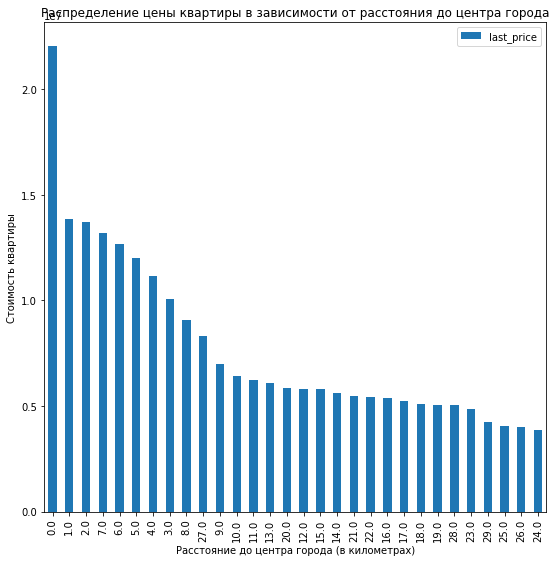

In [60]:
data_petersburg = data_clear.query('locality_name == "Санкт-Петербург"')
data_pivot_petersburg = data_petersburg.pivot_table(values='last_price', index='city_centers_kilometer', aggfunc='mean')
data_pivot_petersburg['last_price'] = data_pivot_petersburg['last_price'].round(0)
data_pivot_petersburg = data_pivot_petersburg.sort_values(by='last_price', ascending=False)
data_pivot_petersburg.plot(kind='bar', figsize=(9,9))

plt.title('Распределение цены квартиры в зависимости от расстояния до центра города')
plt.xlabel('Расстояние до центра города (в километрах)')
plt.ylabel('Стоимость квартиры')
plt.show()

In [56]:
data_petersburg['last_price'].corr(data_petersburg['city_centers_kilometer'])

-0.37927848212318455

Действительно, по мере удаления от центра Санкт-Петербурга квартиры становятся дешевле, однако значение корреляции -0,38 не достаточно велико, чтобы говорить об однозначной зависимости. Так, к примеру, как видно из сводной таблицы, средняя цена квартиры на расстоянии 28 километров от центра стоит примерно также как и на расстоянии 9 километров, и в целом не смотря на понижающий тренд, некоторые значения выбиваются, так с 4 по 8 километр от центра цена напротив возрастает по мере удаления от центра. 

Однако, в целом, наблюдается снижение стоимости квартир по мере удаления от центра города. 

### Напишите общий вывод

**В ходе анализа были проведены следующие шаги:**
1. Изучение общей информации о данных
2. Предобработка данных
    1. На данном этапе было обнаружено достаточное количество пропусков, большая часть из них в тех столбцах, которые заполнялись автоматически на основе данных геосервисов (parks_nearest, ponds_nearest). Также были изменены типы данных в некоторых столбцах, в том числе rooms (float в int), balcony(float в int), is_apartment(float в bool), first_day_exposition (object в datetime).
3. Добавление в таблицу новых столбцов
    1. На данном этапе в таблицу были добавлены столбцы, которые в дальнейшем используются при анализе, так, например, рассчитывалось влияние типа этажа на стоимость квартиры.
4. Обработка выбивающихся значений
    1. На данном этапе с помощью гистограмм и сортировки значений таблицы из данных были удалены значения, которые значительно отличались от остальной выборки, некоторые значения были логически восстановлены. Для измененной таблицы была создана новая переменная, в конце этапа были построены гистограммы по значениям таблица до обработки выбросов и после нее, гистограммы по измененной таблице более читаемы и приближены к распределению Пуассона.
5. Расчет среднего времени продажи квартир
    1. На данном этапе были рассчитаны среднее и медианное количество дней от публикации до снятия объявления: 182.57 и 99.0, соответственно. Вывод по длительности размещения объявлений: Большее количество квартир продается в период от 1,5 до 3 месяцев. Продажи быстрее чем за 1 месяц можно считать необычно быстрыми. Объявления, которые висят дольше 2 лет слишком долгие, возможно, владельцам стоит задуматься над условиями продажи.
6. Поиск зависимостей между ценой квартиры и другими параметрами
    1. На данном этапе была рассчитана корреляция между: общей площадью и ценой = 0.77, жилой площадью и ценой = 0.65, площадью кухни и ценой = 0.58, количеством комнат и ценой = 0.49. Зависимость между датой размещения объявления и ценой квартиры не обнаружена. Стоит обратить внимание, что средняя цена квартир, расположенных на первом и последнем этажах, ниже, чем квартир на других этажах на 22 и 10 процентов соответственно.
7. Расчет средней цены одного квадратного метра в 10 наиболее часто встречающихся в объявлениях городах
    1. Из десяти городов с наибольшим количеством размещенных объявлений на первом месте по средней цене за квадратный метр находится Санкт-Петербург. Средняя цена за квадратный метр в нем составляет 108323 рубля. На последнем месте находится Выборг - 58481 рубль.
8. Расчет зависимости цены объектов Санкт-Петербурга от их расстояния до центра города
    1. На последнем этапе была посчитана корреляция между расстоянием до центра Санкт-Петербурга и ценой квартиры. По мере удаления от центра Санкт-Петербурга квартиры становятся дешевле, значение корреляции составило -0,40. Однако, некоторые значения выбиваются, так, к примеру, средняя цена квартиры на расстоянии 28 километров от центра стоит примерно также как и на расстоянии 6 километров. Однако понижающий тренд в цене квартир по мере удаления их от центра прослеживается.